<a href="https://colab.research.google.com/github/riskydevandra/soft_computing_praktik/blob/main/nndl_m13a_5200411476.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NPM : 5200411476

---

NAMA : risky devandra hartana

## Algoritma Genetika (Optimasi Kontinu)

### Library

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

### parameter algoritma genetika

In [ ]:
# parameter algoritma genetika
# inisialisasi parameter GA
#ukuran populasi
uk_pop = 10

max_generasi = 100 # untuk melakukan putar pada setiap proses (generasi)
bts_bawah = -3
bts_atas = 5
jum_var = 2
jum_gen_per_var = 4
jum_gen = jum_var * jum_gen_per_var
# print("Jumlah gen = ", jum_gen)
pc = 0.8 # peluang crossover
pm = 0.1 
best_kromoson = []
best_fitness = 0
best_genotipe = []
list_best_fitness = []
max_fitness = 165

### kromosom / populasi

In [ ]:
# populasi biner
kromosom = np.round(np.random.rand(uk_pop, jum_gen))
# print(kromosom)
print("kromosom =", len(kromosom))

kromosom = 10


Dekode Kromosom Biner ke Desimal

In [ ]:
def dekode_biner_to_desimal(krom):
  idx_awal = 0
  idx_akhir = jum_gen_per_var
  desimal= []

  for i in range(jum_var):
    k = krom[idx_awal:idx_akhir]
    temp1 = 0
    temp2 = 0

    for j in range(jum_gen_per_var):
      temp1 = temp1 + (k[j] * 2**(-(j+1)))
      temp2 = temp2 + 2**(-(j+1))
    
    temp_desimal = bts_bawah + (bts_atas - bts_bawah/temp2) * temp1

    desimal.append(round(temp_desimal))
    idx_awal = idx_akhir
    idx_akhir = idx_akhir + jum_gen_per_var

  return desimal

### fungsi fitness

In [ ]:
def hitung_fitness(x):
  # y = 1000 * (x[0] - 2 * X[1] **2 + (1 - x[0])) **2
  # y = 1 / (x[0]**2 + x[1]**2 + 0.001)
  y = 2 * x[0]**2 - 5 * x[1] + 100
  y = round(y)
  
  return y

In [ ]:
# linear fitness ranking
def linear_fitness_ranking(fitness):
  sort_fitness = sorted(fitness)
  max_fitness = sort_fitness[-1] # ambil elemen terakhir
  min_fitness = sort_fitness[0]
  LFR = []
  for i in range(uk_pop):
    LFR.append(max_fitness - (max_fitness - min_fitness) * ((i+1)-1) / (uk_pop-1))
    

  return LFR

### seleksi orang tua

In [ ]:
# seleksi orang tua (roulette wheel)
def roulette_wheel(krom, fitness):
  # menskalakan nilai fitness dengan linear fitness ranking
  LFR = linear_fitness_ranking(fitness)

  # membuat proporsi nilai fitness tiap kromosom
  kumulatif_fitness = 0
  acak = random.uniform(0,1)
  idx_induk = 0
  for i in range(uk_pop):
    kumulatif_fitness = kumulatif_fitness + (LFR[i] / sum(LFR))
    if (kumulatif_fitness > acak):
      idx_induk = i
      break
  
  return idx_induk

### Crossover

In [ ]:
# rekombinasi satu titik
def crossover_1_titik(krom1, krom2):
  # konversi array ke list agar bisa diconcate
  krom1 = list(krom1)
  krom2 = list(krom2)

  # tentukan titik potong
  titik = int(np.fix(np.random.rand() * jum_gen) + 1)

  # menukar gen
  anak1 = krom1[0:titik] + krom2[titik:]
  anak2 = krom2[0:titik] + krom1[titik:]
  
  return anak1, anak2


In [ ]:
# rekombinasi banyak titik
def crossover_n_titik(krom1, krom2, jum_titik_potong=1):
  # konversi array ke list agar bisa diconcate
  krom1 = list(krom1)
  krom2 = list(krom2)

  # tentukan titik potong
  batas = 0
  titik = []
  pembagi = int(np.fix(jum_gen / jum_titik_potong))
  for i in range(jum_titik_potong):
    acak = int(np.fix(np.random.rand() * pembagi + 1))
    batas = batas + acak
    titik.append(batas)
  titik.append(jum_gen)

  # tukar gen
  anak1 =[]
  anak2 =[]
  idx = 0
  for i in range(len(titik)):
    # tukar gen ketika i genap (agar pertukaran selang - selang antara genjil dan genap)
    if (i % 2 == 0):
      anak1 = anak1 + krom2[idx:titik[i]]
      anak2 = anak2 + krom1[idx:titik[i]]
    else:
      anak1 = anak1 + krom1[idx:titik[i]]
      anak2 = anak2 + krom2[idx:titik[i]]
    idx = titik[i]

  return anak1, anak2

In [ ]:
# rekombinasi seragam
def crossover_uniform(krom1, krom2):
  pola = np.round(np>random.rand(jum_gen))
  anak1 = krom1
  anak2 = krom2
  for i in range(jum_gen):
    if (pola[i] == 1):
      # tukar gen
      anak1[i], anak2[i] = anak2[i], anak1[i]
      
  return anak1, anak2

### mutasi

In [ ]:
# mutasi biner
def mutasi_biner(krom):
  acak = random.uniform(0,1)
  for j in range(jum_gen):
    if(acak <= pm):
      krom[j] = 1 - krom[j]
  
  return krom

### proses evolusi

In [ ]:
# ----------------------------------------------------------
# proses evolusi kromosom
# ----------------------------------------------------------
generasi = 0
while (generasi < max_generasi and best_fitness < max_fitness):
  # evaluasi fitness
  desimal = []
  fitness = []
  for j in range(uk_pop):
    des = dekode_biner_to_desimal(kromosom[j])
    fit = hitung_fitness(des)
    desimal.append(des)
    fitness.append(fit)

    if (best_fitness < fit):
      best_fitness = fit
      idx_best_kromosom = j
      best_kromosom = kromosom[j].copy()
      best_genotipe = desimal[j].copy() # karena tidak ada dekode kromosom

  # simpan best_fitness dari semua kromosom di tiap generasi
  list_best_fitness.append(best_fitness)

  # tampilkan informasi tiap generasi
  print("Generasi Ke-" + str(generasi) + " ==> " + str(best_genotipe) + " = " + str(best_fitness))

  # elitisme 
  kromosom_anak = []
  if (uk_pop % 2 == 0):
    kromosom_anak.append(best_kromosom.copy())
    kromosom_anak.append(best_kromosom.copy())
    iterasi_mulai = 2
  else:
    kromosom_anak.append(best_kromosom.copy())
    iterasi_mulai = 1
  
  # seleksi induk / orang tua
  idx_induk = []
  for i in range(iterasi_mulai, uk_pop):
    idx_induk.append(roulette_wheel(kromosom, fitness))
  # random.shuffle(idx_induk)

  # crossover kromosom
  jum_pasangan_induk = int(len(idx_induk) / 2)
  for i in range(jum_pasangan_induk):
    induk1 = kromosom[idx_induk[i]]
    induk2 = kromosom[idx_induk[i + 1]]
    acak = random.uniform(0,1)

    if(acak <= pc):
      anak1, anak2 = crossover_1_titik(induk1, induk2)
      # anak1, anak2 = crossover_n_titik(induk1, induk2, jum_titik_potong = 2)
      # anak1, anak2 = crossover_uniform(induk1, induk2)
      kromosom_anak.append(anak1.copy())
      kromosom_anak.append(anak2.copy())
    else:
      kromosom_anak.append(induk1.copy())
      kromosom_anak.append(induk2.copy())
    
    i +=2
  # mutasi kromosom (kromosom elit tidak dimutasi)
  for i in range(iterasi_mulai, uk_pop):
    kromosom_anak[i] = mutasi_biner(kromosom_anak[i])
  
  # generational replacement
  kromosom = kromosom_anak.copy()

  generasi +=1


Generasi Ke-0 ==> [4, -2] = 142
Generasi Ke-1 ==> [4, -2] = 142
Generasi Ke-2 ==> [4, -2] = 142
Generasi Ke-3 ==> [5, 0] = 150
Generasi Ke-4 ==> [5, 0] = 150
Generasi Ke-5 ==> [5, 0] = 150
Generasi Ke-6 ==> [5, -1] = 155
Generasi Ke-7 ==> [5, -1] = 155
Generasi Ke-8 ==> [5, -1] = 155
Generasi Ke-9 ==> [5, -1] = 155
Generasi Ke-10 ==> [5, -1] = 155
Generasi Ke-11 ==> [5, -1] = 155
Generasi Ke-12 ==> [5, -1] = 155
Generasi Ke-13 ==> [5, -1] = 155
Generasi Ke-14 ==> [5, -1] = 155
Generasi Ke-15 ==> [5, -1] = 155
Generasi Ke-16 ==> [5, -1] = 155
Generasi Ke-17 ==> [5, -1] = 155
Generasi Ke-18 ==> [5, -1] = 155
Generasi Ke-19 ==> [5, -1] = 155
Generasi Ke-20 ==> [5, -1] = 155
Generasi Ke-21 ==> [5, -1] = 155
Generasi Ke-22 ==> [5, -3] = 165


### hasil optimasi

Total Best = [5, -3] = 165 (3)
Best Kromosom = [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]


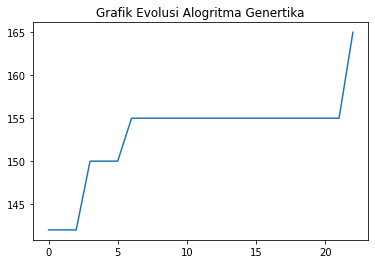

In [ ]:
# tampilkan hasil optimasi
print("Total Best = " + str(best_genotipe) + " = " + str(best_fitness) + " ("+ str(idx_best_kromosom)+ ")")
print("Best Kromosom = " + str(best_kromosom))
plt.title("Grafik Evolusi Alogritma Genertika")
plt.plot(list_best_fitness)
plt.show(block=False)
# plt.waitforbuttonpress()